In [2]:
from spectral_cube import SpectralCube #To read FITS
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Angle
from skimage import measure
from astropy import wcs
import cube_x3d as c3
import matplotlib.pyplot as plt
from matplotlib import cm
from astroquery.skyview import SkyView

In [2]:
import importlib
importlib.reload(c3)

<module 'cube_x3d' from 'c:\\Users\\ixaka\\Documents\\Visualization\\cube_x3d\\cube_x3d.py'>

In [25]:
%cd c:\Users\ixaka\Documents\Visualization

[Errno 2] No such file or directory: 'c:UsersixakaDocumentsVisualization'
/home/ixakalabadie/Visualization/cube_x3d


In [32]:
import csv
with open('one_stats.csv', 'r') as file:
    reader = csv.reader(file)
    data = np.array(list(reader))
    head = data[0]
    print(head)
    data = np.delete(data, 0, axis=0)
    # print(data)


['Name' 'FITS' 'HIcont' 'HIcont_p' 'Voxels' 'Image size' 'High/No'
 'Levels']


In [23]:
data[25] = np.array(['HCG56', '682.007', '6.91597243446143e-310', '3.86838085e-316',
       '178782208.0', '6.9159724193201e-310', np.nan, np.nan,
       np.nan, np.nan, '0.0'], dtype='<U21')

In [33]:
objects = data[:,0]
fits_size = data[:,1].astype(float)
hicont = data[:,2].astype(float)
hicont_p = data[:,3].astype(float)
voxels = data[:,4].astype(float)
im_size = data[:,5].astype(float)
highno = data[:,6].astype(float)
# tri2 = data[:,7].astype(float)
# tri3 = data[:,8].astype(float)
# tri5 = data[:,9].astype(float)
lev = data[:,7].astype(float)

In [35]:
len(lev)

41

Text(0.5, 1.0, 'ONE SURFACE (rms=3)')

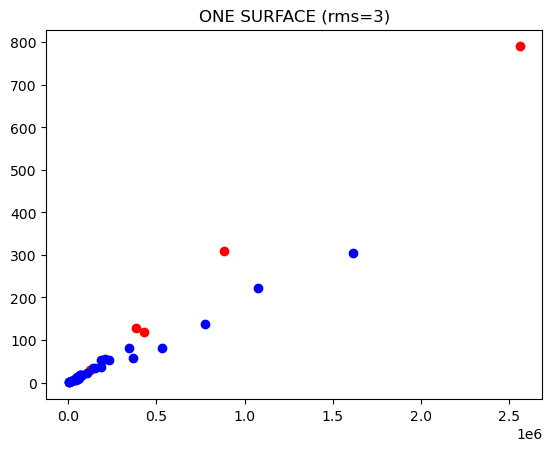

In [31]:
start=5
plt.plot(hicont[:start], highno[:start], 'ro')
plt.plot(hicont[start:], highno[start:], 'bo')
plt.title('ONE SURFACE (rms=3)')
# plt.yscale('log')
# plt.xscale('log')

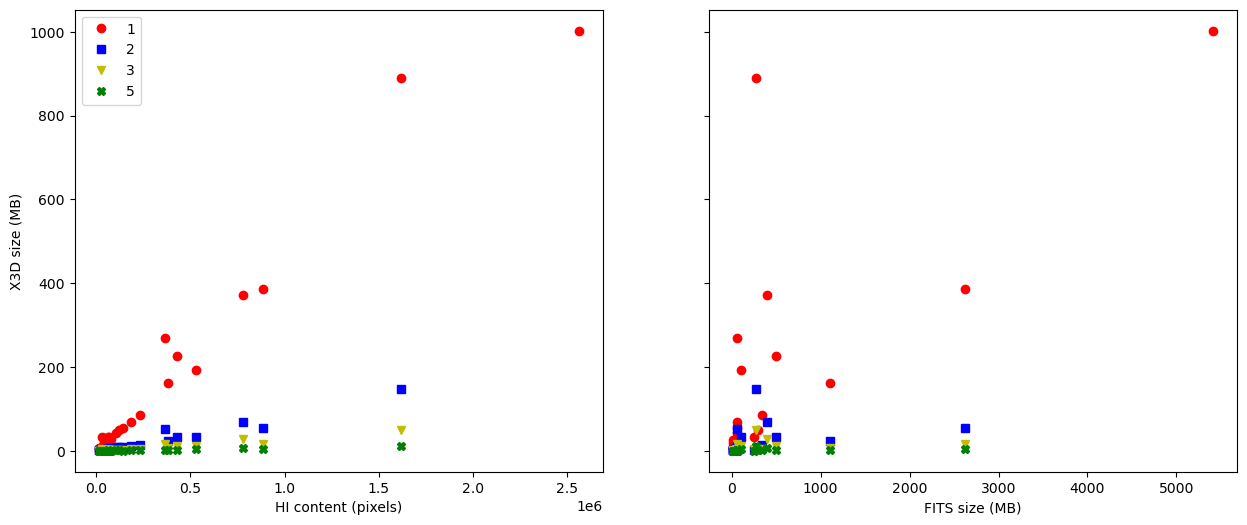

In [27]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
# fig.suptitle('VLA')
plt.axes(ax[0])
plt.plot(hicont[lev==10][start:], highno[lev==10][start:], 'or', label='1')
plt.plot(hicont[lev==10][start:], tri2[lev==10][start:], 'sb', label='2')
plt.plot(hicont[lev==10][start:], tri3[lev==10][start:], 'vy', label='3')
plt.plot(hicont[lev==10][start:], tri5[lev==10][start:], 'Xg', label='5')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(fits_size[lev==10][start:], highno[lev==10][start:], 'or', label='1')
plt.plot(fits_size[lev==10][start:], tri2[lev==10][start:], 'sb', label='2')
plt.plot(fits_size[lev==10][start:], tri3[lev==10][start:], 'vy', label='3')
plt.plot(fits_size[lev==10][start:], tri5[lev==10][start:], 'Xg', label='5')
plt.xlabel('FITS size (MB)');

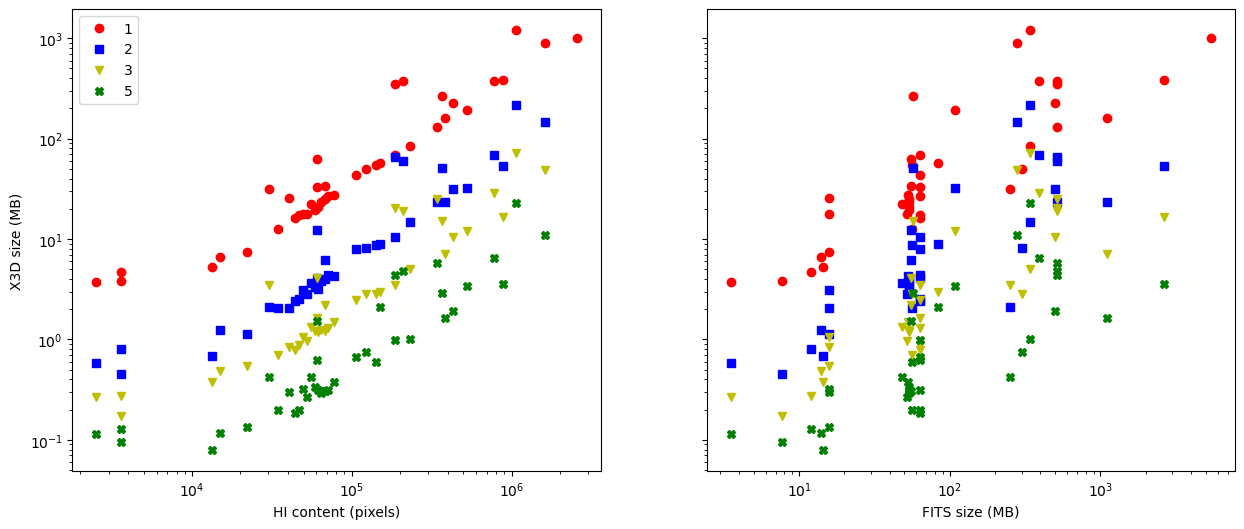

In [13]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
# fig.suptitle('VLA')
plt.axes(ax[0])
plt.plot(hicont[start:], highno[start:], 'or', label='1')
plt.plot(hicont[start:], tri2[start:], 'sb', label='2')
plt.plot(hicont[start:], tri3[start:], 'vy', label='3')
plt.plot(hicont[start:], tri5[start:], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(fits_size[start:], highno[start:], 'or', label='1')
plt.plot(fits_size[start:], tri2[start:], 'sb', label='2')
plt.plot(fits_size[start:], tri3[start:], 'vy', label='3')
plt.plot(fits_size[start:], tri5[start:], 'Xg', label='5')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('FITS size (MB)');

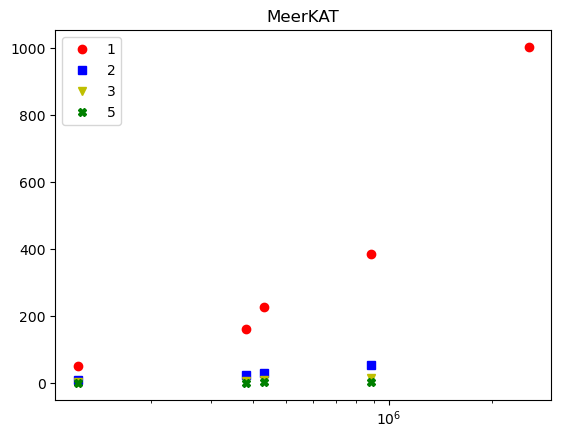

In [16]:
plt.plot(hicont[:5], highno[:5], 'or', label='1')
plt.plot(hicont[:5], tri2[:5], 'sb', label='2')
plt.plot(hicont[:5], tri3[:5], 'vy', label='3')
plt.plot(hicont[:5], tri5[:5], 'Xg', label='5')
plt.legend()
# plt.yscale('log')
plt.xscale('log')
plt.title('MeerKAT');